Import dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Import data

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data=data.dropna()

label encoding

In [10]:
data.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

C:\Users\adith\AppData\Local\Temp\ipykernel_33488\3631174989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)


In [12]:
data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [13]:
data['Dependents'].replace({'3+':4},inplace=True)

C:\Users\adith\AppData\Local\Temp\ipykernel_33488\2998622993.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Dependents'].replace({'3+':4},inplace=True)
C:\Users\adith\AppData\Local\Temp\ipykernel_33488\2998622993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dependents'].replace({'3+':4},inplace=True)


In [16]:
data.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
data.replace({'Married':{'Yes':1,'No':0}},inplace=True)
data.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
data.replace({'Self_Employed':{'Yes':1,'No':0}},inplace=True)
data.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

C:\Users\adith\AppData\Local\Temp\ipykernel_33488\1825042954.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
C:\Users\adith\AppData\Local\Temp\ipykernel_33488\1825042954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
C:\Users\adith\AppData\Local\Temp\ipykernel_33488\1825042954.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To reta

In [17]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


data visualization

<Axes: xlabel='Loan_Status', ylabel='count'>

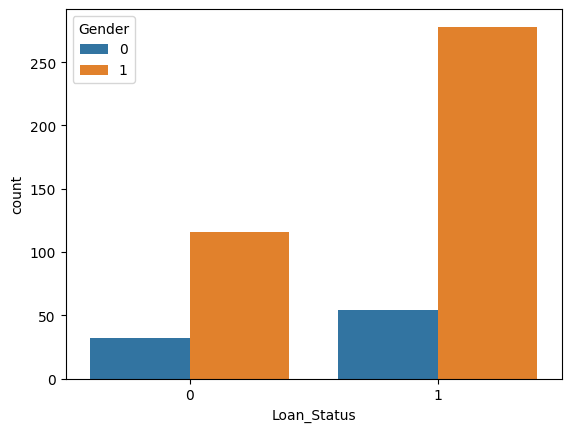

In [19]:
sns.countplot(x='Loan_Status',hue='Gender',data=data)



<Axes: xlabel='Loan_Status', ylabel='count'>

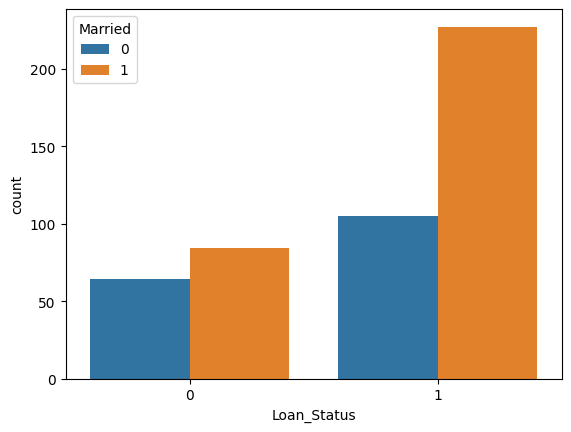

In [20]:
sns.countplot(x='Loan_Status',hue='Married',data=data)


<Axes: xlabel='Loan_Status', ylabel='count'>

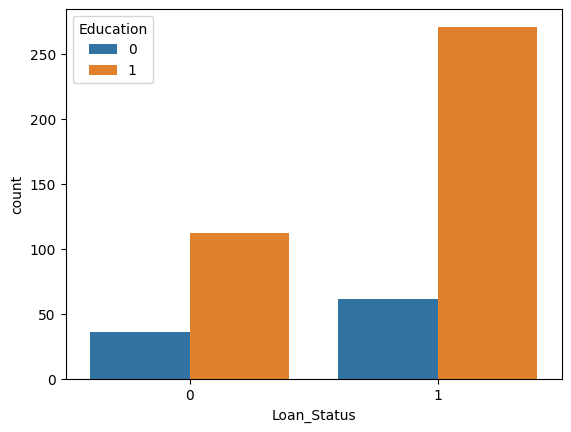

In [21]:
sns.countplot(x='Loan_Status',hue='Education',data=data)

<Axes: xlabel='Loan_Status', ylabel='count'>

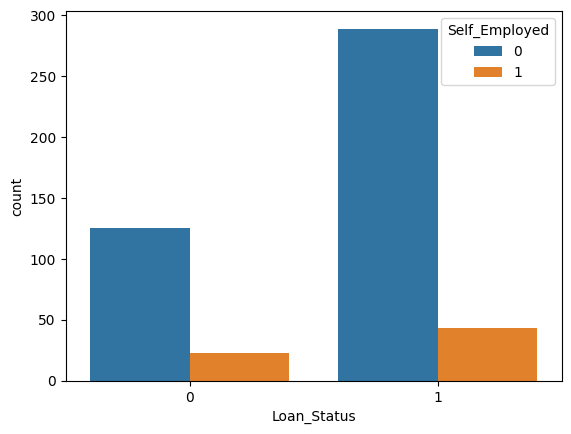

In [22]:
sns.countplot(x='Loan_Status',hue='Self_Employed',data=data)

<Axes: xlabel='Loan_Status', ylabel='count'>

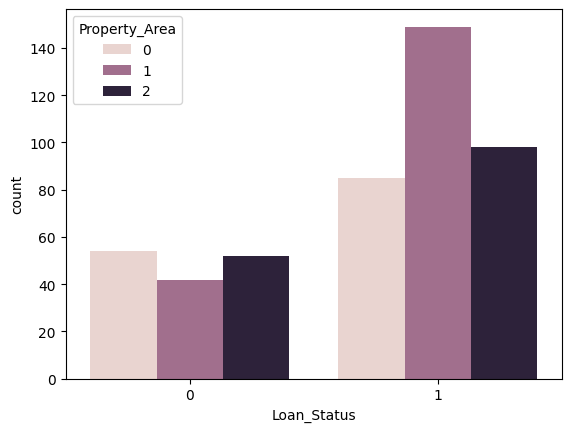

In [23]:
sns.countplot(x='Loan_Status',hue='Property_Area',data=data)

<Axes: xlabel='Loan_Status', ylabel='count'>

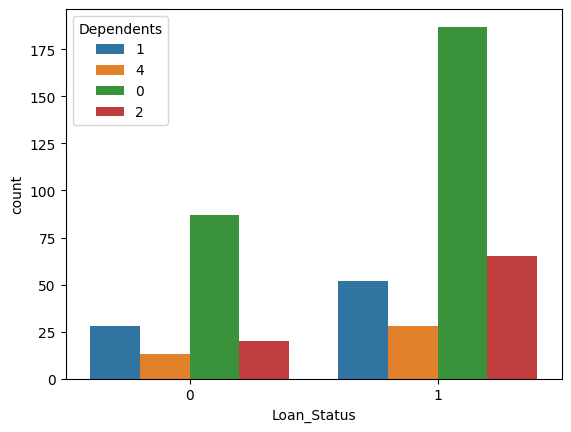

In [24]:
sns.countplot(x='Loan_Status',hue='Dependents',data=data)

In [25]:
x=data.drop(columns=['Loan_ID','Loan_Status'])
y=data['Loan_Status']

In [27]:
print(x)


     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [28]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


Spliting the data

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [37]:
print(x.shape,x_train.shape,x_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model

In [38]:
classifier=svm.SVC(kernel='linear')

In [39]:
classifier.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [40]:
training_data_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(training_data_prediction,y_train)
print("training_data_accuracy",training_data_accuracy)


training_data_accuracy 0.7962962962962963


In [41]:
testing_data_prediction=classifier.predict(x_test)
testing_data_accuracy=accuracy_score(testing_data_prediction,y_test)
print("testing_data_accuracy",testing_data_accuracy)

testing_data_accuracy 0.8125


In [42]:
input_data=(LP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
print(std_data)
prediction=classifier.predict(std_data)
print(prediction)
if(prediction[0]==0):
    print("The person is not eligible for loan")
else:
    print("The person is eligible for loan")

SyntaxError: invalid syntax (3611063354.py, line 1)